In [ ]:
!pip install tensorflow numpy matplotlib scikit-learn panda

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=a4eea1295ad21141464539e847f21c6997af053ac1251074bd3f92cb0e684488
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone data/Crop_recommendation.csv')
# data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone data/Crop_recommendation (1).csv')
# data3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone data/Crop_recommendation (2).csv')
# data4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone data/Crop_recommendation (3).csv')

data1 = pd.read_csv('/content/drive/MyDrive/content/drive/myDrive/Crop_recommendation.csv')

In [ ]:
# merged_data = pd.concat([data1, data2, data3, data4], ignore_index=True)
merged_data = data1

In [ ]:
merged_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
X = merged_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # Features
y = merged_data['label']

In [ ]:
y_encoded = pd.get_dummies(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_encoded.shape[1], activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 22)                  │             726 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,318 (12.96 KB)

 Trainable params: 3,318 (12.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2100 - loss: 2.7833 - val_accuracy: 0.7295 - val_loss: 1.3736
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7956 - loss: 1.0242 - val_accuracy: 0.8545 - val_loss: 0.5108
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9058 - loss: 0.4035 - val_accuracy: 0.9227 - val_loss: 0.3158
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9450 - loss: 0.2443 - val_accuracy: 0.9341 - val_loss: 0.2318
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9577 - loss: 0.1732 - val_accuracy: 0.9432 - val_loss: 0.1940
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9626 - loss: 0.1455 - val_accuracy: 0.9545 - val_loss: 0.1543
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9789 - loss: 0.1021 - val_accuracy: 0.9568 - val_loss: 0.1399
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9775 - loss: 0.0886 - val_accuracy: 0.

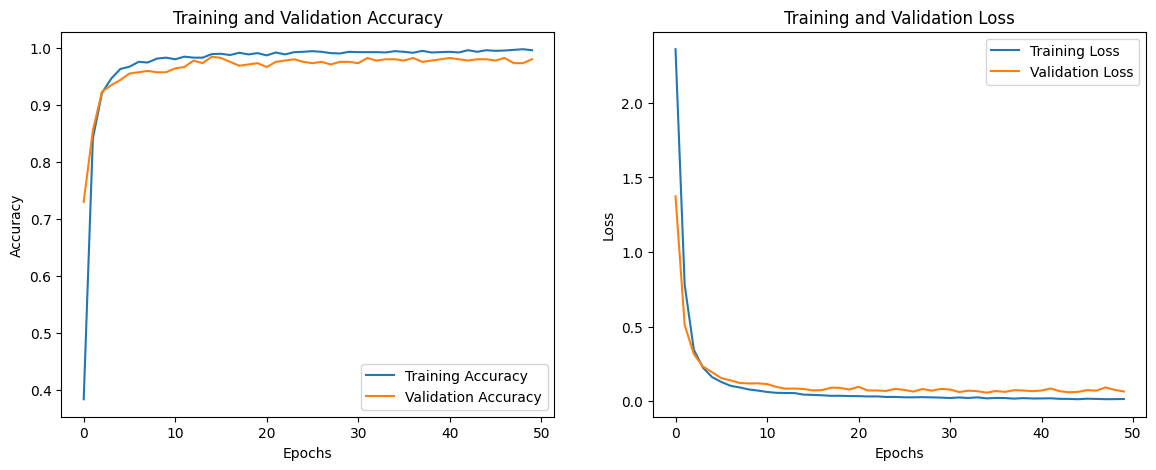

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()